## CS 675 Midterm Project
#### Neha F. Kazi, immy R. Najjar, Megan Resurreccion, 

**Import Packages**

In [205]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
import seaborn as sns
import graphviz
import plotly.express as px
from sklearn import metrics, neighbors, preprocessing, model_selection, datasets, svm, cluster, datasets, mixture, tree
from sklearn.cluster import KMeans, MeanShift, DBSCAN, AgglomerativeClustering
from sklearn.datasets import make_moons, make_blobs
from sklearn.decomposition import PCA, KernelPCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix, silhouette_score, calinski_harabasz_score
from sklearn.metrics.cluster import completeness_score, homogeneity_score
from sklearn.metrics.pairwise import euclidean_distances,cosine_distances,manhattan_distances,cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor
pd.options.display.max_rows = 50
pd.options.display.float_format = '{:,.2f}'.format

In [206]:
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')

In [207]:
train_df.shape

(1460, 81)

**Replace string values with numerical ones**

In [208]:
train_df['LotFrontage'].fillna('NA',inplace=True)
train_df['LotFrontage'].fillna('Alley',inplace=True)
train_df['MasVnrType'].fillna('NA',inplace=True)
train_df['MasVnrArea'].fillna('NA',inplace=True)
train_df['BsmtQual'].fillna('NA',inplace=True)
train_df['BsmtCond'].fillna('NA',inplace=True)
train_df['BsmtExposure'].fillna('NA',inplace=True)
train_df['BsmtFinType1'].fillna('NA',inplace=True)
train_df['BsmtFinType2'].fillna('NA',inplace=True)
train_df['Electrical'].fillna('NA',inplace=True)
train_df['GarageType'].fillna('NA',inplace=True)
train_df['GarageYrBlt'].fillna('NA',inplace=True)
train_df['GarageFinish'].fillna('NA',inplace=True)
train_df['GarageQual'].fillna('NA',inplace=True)
train_df['GarageCond'].fillna('NA',inplace=True)
train_df['FireplaceQu'].fillna('NA',inplace=True)
train_df['PoolQC'].fillna('NA',inplace=True)
train_df['Fence'].fillna('NA',inplace=True)
train_df['MiscFeature'].fillna('NA',inplace=True)
train_df['Alley'].fillna('NA',inplace=True)

In [209]:
pavement = {'Y': 1.0, 'P': 0.5, 'N': 0}
train_df.PavedDrive = [pavement[item] for item in train_df.PavedDrive]

In [210]:
function = {'Typ': 8, 'Min1': 7, 'Min2': 6, 'Mod': 5, 'Maj1': 4, 'Maj2': 3, 'Sev': 2, 'Sal': 1}
train_df.Functional = [function[item] for item in train_df.Functional]


In [211]:
util = {'AllPub': 4, 'NoSewr': 3, 'NoSeWa': 2, 'ELO': 1}
train_df.Utilities = [util[item] for item in train_df.Utilities]


In [212]:
bsmtex = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0}
train_df.BsmtExposure = [bsmtex[item] for item in train_df.BsmtExposure]

In [213]:
air = {'Y': 1, 'N': 0}
train_df.CentralAir = [air[item] for item in train_df.CentralAir]

In [214]:
fen = {'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, 'NA': 0}
train_df.Fence = [fen[item] for item in train_df.Fence]

In [215]:
rating = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
train_df.BsmtQual = [rating[item] for item in train_df.BsmtQual]
train_df.BsmtCond = [rating[item] for item in train_df.BsmtCond]
train_df.KitchenQual = [rating[item] for item in train_df.KitchenQual]
train_df.HeatingQC = [rating[item] for item in train_df.HeatingQC]
train_df.FireplaceQu = [rating[item] for item in train_df.FireplaceQu]
train_df.PoolQC = [rating[item] for item in train_df.PoolQC]

**New Feature 1: Average of OverallQual and OverallCond**

In [216]:
train_df['OverallRating'] = ((train_df['OverallQual']+train_df['OverallCond'])/2)
train_df['OverallRating'].head()
train_df = train_df.drop(['OverallQual','OverallCond'],axis=1)

**New Feature 2: Total Square Feet of 1st and 2nd Floors**

In [217]:
train_df['TotalFloorSqFt'] = train_df['1stFlrSF']+train_df['2ndFlrSF']
train_df['TotalFloorSqFt'].head()
train_df = train_df.drop(['1stFlrSF','2ndFlrSF'],axis=1)

**New Feature 3: Total Outdoor Porch and Deck Square Feet**

In [218]:
train_df['TotalPorchDeckSqFt'] = (train_df['WoodDeckSF']+train_df['OpenPorchSF']
                                +train_df['EnclosedPorch']+train_df['3SsnPorch']
                                +train_df['ScreenPorch'])

train_df = train_df.drop(['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch'],axis=1)


**New Feature 4: Garage Overall Quality**

In [219]:
garage = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
train_df.GarageQual = [garage[item] for item in train_df.GarageQual]
train_df.GarageCond = [garage[item] for item in train_df.GarageCond]

train_df['GarageOverall'] = ((train_df['GarageQual']+train_df['GarageCond'])/2)

train_df = train_df.drop(['GarageQual','GarageCond'],axis=1)

**New Feature 5: Exterior Overall Quality**

In [220]:
exterior = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
train_df.ExterQual = [exterior[item] for item in train_df.ExterQual]
train_df.ExterCond = [exterior[item] for item in train_df.ExterCond]

train_df['ExterOverall'] = ((train_df['ExterQual']+train_df['ExterCond'])/2)

train_df = train_df.drop(['ExterQual','ExterCond'],axis=1)

**Initial Features and Target Feature**

In [221]:
train_feats = train_df.drop(['Id','SalePrice'],axis=1)
train_feats = train_df[['MSSubClass','LotArea','Utilities',
                       'YearBuilt','YearRemodAdd','BsmtQual','BsmtCond',
                       'BsmtExposure','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
                        'TotalBsmtSF','HeatingQC','CentralAir','LowQualFinSF',
                        'GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
                        'BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd',
                        'Functional','Fireplaces','FireplaceQu','GarageCars', 'GarageArea',
                        'PoolArea','PoolQC','Fence','MiscVal','OverallRating','TotalFloorSqFt',
                        'TotalPorchDeckSqFt','GarageOverall','PavedDrive','TotalPorchDeckSqFt',
                       'ExterOverall']]
train_target = train_df['SalePrice']

## Initial Linear Regression Test

In [282]:
X = train_feats[['MSSubClass','LotArea','Utilities',
                       'YearBuilt','YearRemodAdd','BsmtQual','BsmtCond',
                       'BsmtExposure','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
                        'TotalBsmtSF','HeatingQC','CentralAir','LowQualFinSF',
                        'GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
                        'BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd',
                        'Functional','Fireplaces','FireplaceQu','GarageCars', 'GarageArea',
                        'PoolArea','PoolQC','Fence','MiscVal','OverallRating','TotalFloorSqFt',
                        'TotalPorchDeckSqFt','GarageOverall','PavedDrive','TotalPorchDeckSqFt',
                       'ExterOverall']].values
y = train_df['SalePrice'].values

In [283]:
X.shape

(1460, 42)

In [284]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [285]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [286]:
y_pred = regressor.predict(X_test)

In [312]:
train_res = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
train_res.tail(15)

,Actual,Predicted
277,219500,"160,870.47"
278,195000,"217,458.73"
279,108000,"121,385.11"
280,149900,"130,945.88"
281,315000,"343,484.61"
282,177500,"163,569.99"
283,140000,"143,900.41"
284,193879,"201,994.17"
285,137900,"189,902.64"
286,118000,"123,357.69"


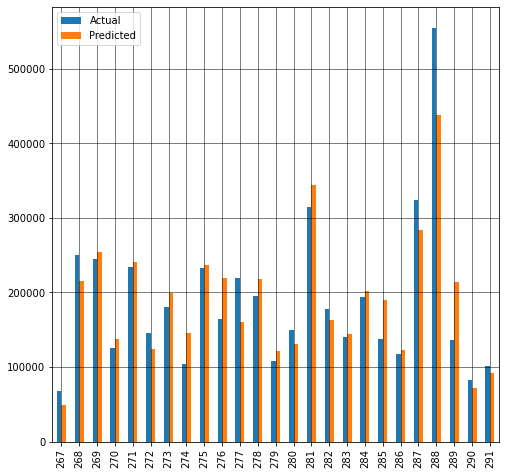

In [313]:
train_res = train_res.tail(25)
train_res.plot(kind='bar',figsize=(8,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [314]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('R-squared Error:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 22434.368427105073
R-squared Error: 0.6634509613293098


Mean Absolute Error is about 22,434.36. R-squared Error is about 0.6634. The model was close in predicting some of the actual values but is overall not that accurate. We will use some dimensionality reduction techniques to see if we can improve the model.

## Attempt to Improve Linear Regression Test 1
Use variance check with features and remove features with low variance.

**Check Feature Variance**

In [330]:
train_df.var()

Id                         177,755.00
MSSubClass                   1,789.34
LotArea                 99,625,649.65
Utilities                        0.00
YearBuilt                      912.22
YearRemodAdd                   426.23
BsmtQual                         0.77
BsmtCond                         0.30
BsmtExposure                     1.14
BsmtFinSF1                 208,025.47
BsmtFinSF2                  26,023.91
BsmtUnfSF                  195,246.41
TotalBsmtSF                192,462.36
HeatingQC                        0.92
CentralAir                       0.06
LowQualFinSF                 2,364.20
GrLivArea                  276,129.63
BsmtFullBath                     0.27
BsmtHalfBath                     0.06
FullBath                         0.30
HalfBath                         0.25
BedroomAbvGr                     0.67
KitchenAbvGr                     0.05
KitchenQual                      0.44
TotRmsAbvGrd                     2.64
Functional                       0.45
Fireplaces  

Select features that all have a variance greater than 0.5.

In [331]:
train_feats1 = train_df[['MSSubClass','LotArea',
                       'YearBuilt','YearRemodAdd','BsmtQual',
                       'BsmtExposure','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
                        'TotalBsmtSF','HeatingQC','LowQualFinSF',
                        'GrLivArea',
                        'BedroomAbvGr','TotRmsAbvGrd',
                        'FireplaceQu','GarageCars', 'GarageArea',
                        'PoolArea','Fence','MiscVal','OverallRating','TotalFloorSqFt',
                        'TotalPorchDeckSqFt']]


In [332]:
train_feats1.shape

(1460, 24)

In [333]:
A = train_feats1[['MSSubClass','LotArea',
                       'YearBuilt','YearRemodAdd','BsmtQual',
                       'BsmtExposure','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
                        'TotalBsmtSF','HeatingQC','LowQualFinSF',
                        'GrLivArea',
                        'BedroomAbvGr','TotRmsAbvGrd',
                        'FireplaceQu','GarageCars', 'GarageArea',
                        'PoolArea','Fence','MiscVal','OverallRating','TotalFloorSqFt',
                        'TotalPorchDeckSqFt']].values
b = train_df['SalePrice'].values

In [334]:
A.shape

(1460, 24)

In [335]:
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.2, random_state=0)


In [336]:
regressor = LinearRegression()  
regressor.fit(A_train, b_train)

LinearRegression()

In [337]:
b_pred = regressor.predict(A_test)

In [338]:
train_res1 = pd.DataFrame({'Actual': b_test.flatten(), 'Predicted': b_pred.flatten()})
train_res1.tail(15)

,Actual,Predicted
277,219500,"169,104.37"
278,195000,"216,777.73"
279,108000,"117,826.76"
280,149900,"136,450.60"
281,315000,"330,669.68"
282,177500,"157,145.02"
283,140000,"147,048.18"
284,193879,"218,967.50"
285,137900,"178,018.55"
286,118000,"128,497.82"


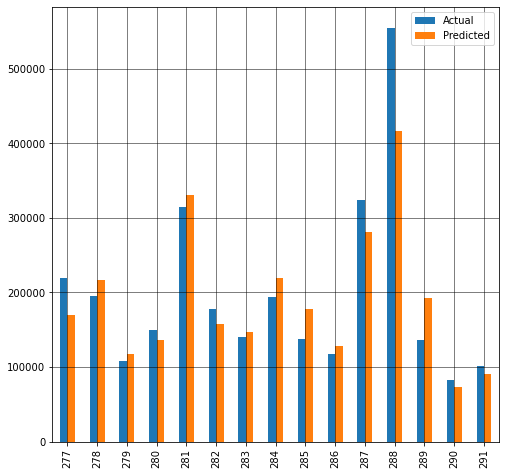

In [339]:
train_res1 = train_res1.tail(15)
train_res1.plot(kind='bar',figsize=(8,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [340]:
print('Mean Absolute Error:', metrics.mean_absolute_error(b_test, b_pred))  
print('R-squared Error:', metrics.r2_score(b_test, b_pred))

Mean Absolute Error: 23314.538395248986
R-squared Error: 0.6519945303565691


Mean Absolute Error is about 23,314.53. R-squared Error is about 0.6519. Compared to the inital model, this model is less accurate, albeit by very little. We will attempt to improve the model more.

## Attempt to Improve Linear Regression Test 2

Select features that all have a variance greater than 1.0 as opposed to just 0.5. We also remove some features we feel may have less importance than others.

In [413]:
train_feats2 = train_df[['MSSubClass','LotArea',
                       'YearRemodAdd',
                       'BsmtExposure',
                        'TotalBsmtSF','LowQualFinSF',
                        'GrLivArea',
                        'TotRmsAbvGrd',
                        'FireplaceQu', 'GarageArea',
                        'PoolArea','Fence','MiscVal','TotalFloorSqFt',
                        'TotalPorchDeckSqFt']]


Standardize Features with StandardScaler

In [414]:
scaler = StandardScaler()
scaler.fit(train_feats2)
x_scale = scaler.transform(train_feats2)
data_scale = pd.DataFrame(x_scale, columns=train_feats2.columns)
data_scale.head(5)

,MSSubClass,LotArea,YearRemodAdd,BsmtExposure,TotalBsmtSF,LowQualFinSF,GrLivArea,TotRmsAbvGrd,FireplaceQu,GarageArea,PoolArea,Fence,MiscVal,TotalFloorSqFt,TotalPorchDeckSqFt
0,0.07,-0.21,0.88,-0.59,-0.46,-0.12,0.37,0.91,-1.01,0.35,-0.07,-0.47,-0.09,0.38,-0.77
1,-0.87,-0.09,-0.43,2.22,0.47,-0.12,-0.48,-0.32,0.65,-0.06,-0.07,-0.47,-0.09,-0.48,0.75
2,0.07,0.07,0.83,0.35,-0.31,-0.12,0.52,-0.32,0.65,0.63,-0.07,-0.47,-0.09,0.53,-0.89
3,0.31,-0.10,-0.72,-0.59,-0.69,-0.12,0.38,0.30,1.20,0.79,-0.07,-0.47,-0.09,0.40,0.80
4,0.07,0.38,0.73,1.28,0.20,-0.12,1.30,1.53,0.65,1.70,-0.07,-0.47,-0.09,1.32,0.60


Implement PCA as an Additional Dimensionality Reduction Technique

In [415]:
pca = PCA()
x_pca = pca.fit_transform(data_scale)
x_pca = pd.DataFrame(x_pca)
x_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.22,0.63,-1.05,-0.39,0.07,-0.47,0.51,0.81,0.86,0.85,0.03,-0.13,-0.34,-0.21,0.00
1,0.26,-1.84,0.56,0.44,-0.10,0.80,-0.09,-0.59,-0.68,-0.78,-0.77,-0.64,-0.91,-0.17,-0.00
2,0.68,-0.37,-0.89,-0.04,0.05,-0.10,0.18,0.46,0.36,-0.52,0.78,0.13,-0.48,0.72,0.00
3,0.79,0.65,-0.36,-0.41,-0.07,-0.12,-0.79,-0.37,-1.12,-0.25,0.11,1.04,-0.53,0.02,0.00
4,3.12,-0.26,-0.67,0.17,0.08,0.09,-0.05,-0.12,0.48,0.05,-0.30,0.34,-1.12,-0.18,0.00


In [416]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([2.82089975e-01, 1.01853043e-01, 8.66345537e-02, 7.09505306e-02,
       6.69158955e-02, 6.49601188e-02, 5.96237673e-02, 5.60029910e-02,
       4.84890364e-02, 4.51343165e-02, 4.15048929e-02, 3.55921349e-02,
       2.78544589e-02, 1.23942860e-02, 7.93714602e-33])

In [417]:
np.cumsum(pca.explained_variance_ratio_)

array([0.28208997, 0.38394302, 0.47057757, 0.5415281 , 0.608444  ,
       0.67340412, 0.73302788, 0.78903087, 0.83751991, 0.88265423,
       0.92415912, 0.95975126, 0.98760571, 1.        , 1.        ])

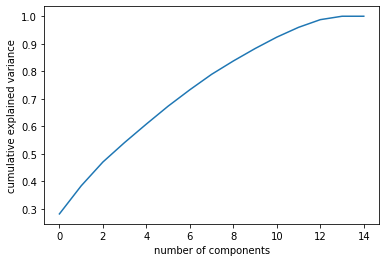

In [419]:
plt.plot(np.arange(15), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [420]:
train_feats2 = train_df[['MSSubClass','LotArea',
                       'YearRemodAdd',
                       'BsmtExposure',
                        'TotalBsmtSF','LowQualFinSF',
                        'GrLivArea',
                        'TotRmsAbvGrd',
                        'FireplaceQu', 'GarageArea']]

In [422]:
C = train_feats2[['MSSubClass','LotArea',
                       'YearRemodAdd',
                       'BsmtExposure',
                        'TotalBsmtSF','LowQualFinSF',
                        'GrLivArea',
                        'TotRmsAbvGrd',
                        'FireplaceQu', 'GarageArea']].values
d = train_df['SalePrice'].values

In [423]:
C_train, C_test, d_train, d_test = train_test_split(C, d, test_size=0.2, random_state=0)

In [424]:
regressor = LinearRegression()  
regressor.fit(C_train, d_train)

LinearRegression()

In [425]:
d_pred = regressor.predict(C_test)

In [426]:
train_res2 = pd.DataFrame({'Actual': d_test.flatten(), 'Predicted': d_pred.flatten()})
train_res2.head(15)

,Actual,Predicted
0,200624,"285,218.43"
1,133000,"135,027.64"
2,110000,"112,729.02"
3,192000,"213,501.92"
4,88000,"78,254.29"
5,85000,"141,072.07"
6,282922,"248,969.79"
7,141000,"144,450.80"
8,745000,"481,603.85"
9,148800,"125,124.48"


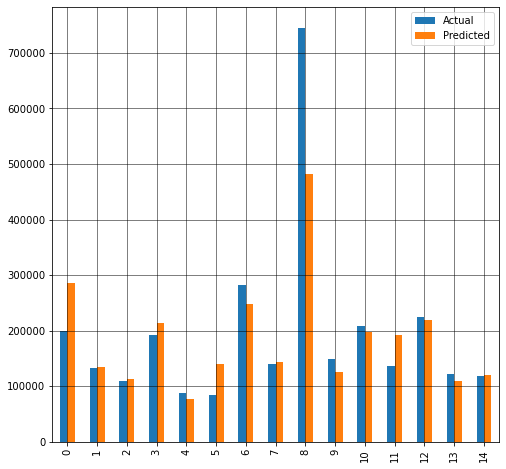

In [427]:
train_res2 = train_res2.head(15)
train_res2.plot(kind='bar',figsize=(8,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [428]:
print('Mean Absolute Error:', metrics.mean_absolute_error(d_test, d_pred))  
print('R-squared Error:', metrics.r2_score(d_test, d_pred))

Mean Absolute Error: 27868.338811908703
R-squared Error: 0.5971859351408314


After another attempt, we unfortunately find that the model is worse than originally used, particularly with an increased Mean Absolute Error value and decreased R-squared error.

## Attempt to Improve Linear Regression Test 3

In [407]:
E = train_df[['MSSubClass','LotArea','Utilities','OverallRating',
                       'YearBuilt','ExterOverall','BsmtQual','BsmtCond',
                       'BsmtExposure','TotalBsmtSF','HeatingQC','CentralAir',
                        'TotalFloorSqFt','GrLivArea','KitchenQual','TotRmsAbvGrd',
                        'Functional','Fireplaces','FireplaceQu','GarageCars',
                        'GarageOverall','PavedDrive','TotalPorchDeckSqFt']].values
f = train_df['SalePrice'].values

In [408]:
E_train, E_test, f_train, f_test = train_test_split(E, f, test_size=0.2, random_state=0)

In [409]:
regressor.fit(E_train, f_train)


LinearRegression()

In [410]:
f_pred = regressor.predict(E_test)
train_res3 = pd.DataFrame({'Actual': f_test.flatten(), 'Predicted': f_pred.flatten()})
train_res3.head(15)

,Actual,Predicted
0,200624,"232,685.13"
1,133000,"145,814.13"
2,110000,"110,370.98"
3,192000,"217,180.12"
4,88000,"81,228.14"
5,85000,"60,434.90"
6,282922,"260,743.24"
7,141000,"149,101.50"
8,745000,"495,205.31"
9,148800,"146,731.16"


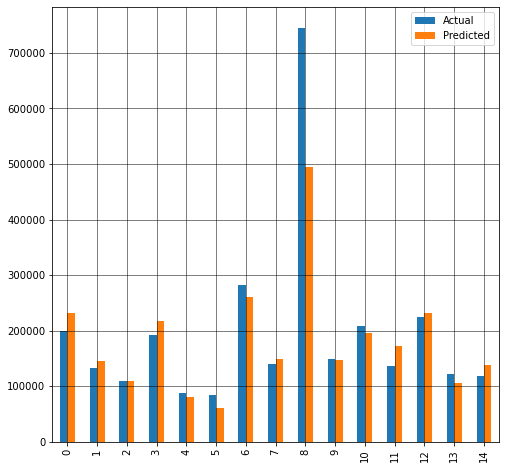

In [411]:
train_res3 = train_res3.head(15)
train_res3.plot(kind='bar',figsize=(8,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [429]:
print('Mean Absolute Error:', metrics.mean_absolute_error(f_test, f_pred))  
print('R-squared Error:', metrics.r2_score(f_test, f_pred))

Mean Absolute Error: 23605.79783977028
R-squared Error: 0.6991839509902085


### Conclusion
After playing around with different features, we found that we could best improve the original model with the features shown above. The r-squared error is higher than it was in the original model with 0.699, even though that means the model is still not accurate. It is possible that linear regression is not the best model for predicting the sale prices of houses in this dataset.